In [60]:
from hashlib import sha256, md5
import cProfile as cp
import timeit
import seaborn as sns
import numpy as np
import statistics
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Funtion that accepts a hash algorithm and hashes a file returning the hash of the file
def hash_function(hasher, file):
    hasher.update(file)
    return hasher.hexdigest()

In [5]:
sha256_hasher = sha256()
md5_hasher = md5()

#List of names of files with varying sizes
file_names = ['01_1MB.bin', '02_5MB.bin', '03_10MB.bin', '04_20MB.bin', '05_50MB.bin']

In [75]:
sha_timeit = []
md_timeit = []

for name in file_names:
    
    #Opens files of given size
    with open("custom_files/{}".format(name), mode='rb') as file: # b is important -> binary
        fileContent = file.read()
        
    #Time Complexity of SHA256 Hash Function
    time1 = %timeit -o hash_function(sha256_hasher, fileContent)
    sha_timeit.append(statistics.mean(time1.timings))

    #Time Complexity of MD5 Hash Function
    time2 = %timeit -o hash_function(md5_hasher, fileContent)
    md_timeit.append(statistics.mean(time2.timings))

548 µs ± 3.36 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.86 ms ± 11.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.71 ms ± 9.72 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
11.5 ms ± 35 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
27.6 ms ± 112 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


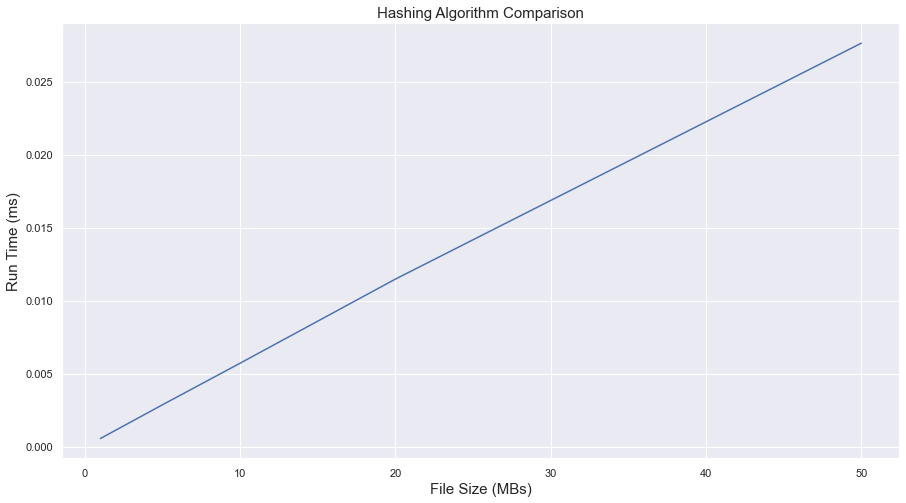

In [76]:
sns.set(style="darkgrid")

file_sizes = [1, 5, 10, 20, 50]

plt.figure(figsize = (15, 8))

p = sns.lineplot(file_sizes, sha_timeit)

p.set_xlabel("File Size (MBs)", fontsize = 15)
p.set_ylabel("Run Time (ms)", fontsize = 15)
p.set_title("Hashing Algorithm Comparison", fontsize = 15)

plt.show()

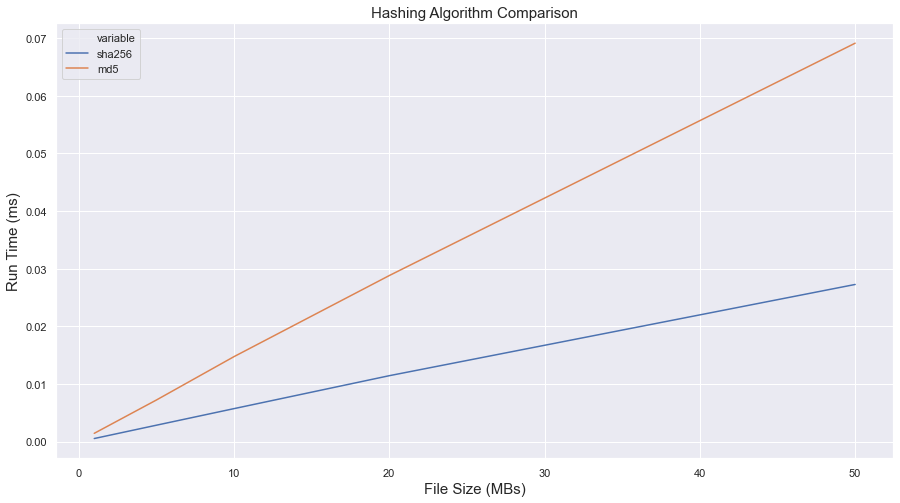

In [74]:
sns.set(style="darkgrid")

file_sizes = [1, 5, 10, 20, 50]

df = pd.DataFrame({'Size':file_sizes, 'sha256':np.reshape(sha_timeit, 5, order='F'),
                  'md5':np.reshape(md_timeit, 5, order='F')})

plt.figure(figsize = (15, 8))

p = sns.lineplot('Size', 'value', hue='variable', 
             data=pd.melt(df, 'Size'))

p.set_xlabel("File Size (MBs)", fontsize = 15)
p.set_ylabel("Run Time (ms)", fontsize = 15)
p.set_title("Hashing Algorithm Comparison", fontsize = 15)

plt.show()